In [1]:
from viewLatex import viewLatex
view = viewLatex

# Explore the combinatorics of the permutahedron and associahedron

## What is the permutahedron ?

A polytope obtained by taking he convex hull of permutations of size $n$

In [2]:
Permu3 = Polyhedron(list(Permutations(3)))
Permu3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 6 vertices (use the .plot() method to plot)

In [3]:
Permu3.plot()

Graphics3d Object

In [4]:
Permu4 = Polyhedron(list(Permutations(4)))
Permu4

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 24 vertices (use the .plot() method to plot)

In [5]:
Permu4.plot()

Graphics3d Object

The oriented skeleton of the permutahedron gives a partial order on permutations: the weak order

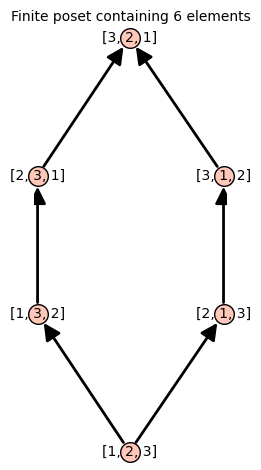

In [6]:
P3 = Permutations(3)
W3 = Poset((P3, lambda x,y: x.permutohedron_lequal(y, side="left")))
W3

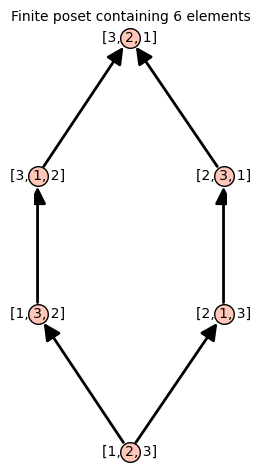

In [7]:
W3_right = Poset((P3, lambda x,y: x.permutohedron_lequal(y, side="right")))
W3_right

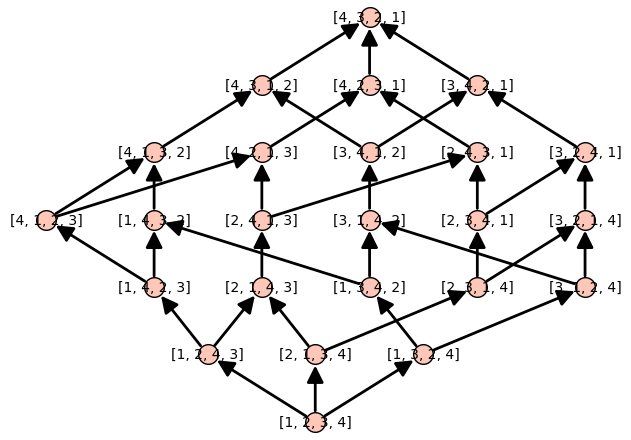

In [8]:
P4 = Permutations(4)
W4 = Poset((P4, lambda x,y: x.permutohedron_lequal(y, side="right")))
W4.plot()

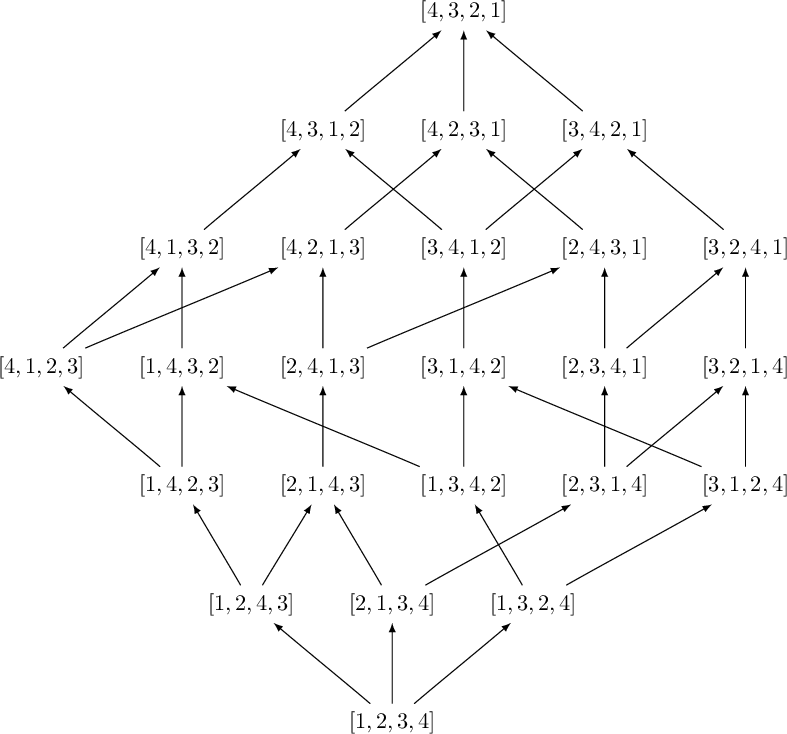

In [9]:
view(W4) # require graphiz and dot2tex installed

In [10]:
W4.is_lattice()

True

In [11]:
LW4 = LatticePoset(W4)

In [12]:
LW4

Finite lattice containing 24 elements (use the .plot() method to plot)

In [13]:
LW4.categories()

[Category of facade finite enumerated lattice posets,
 Category of finite lattice posets,
 Category of lattice posets,
 Category of finite posets,
 Category of posets,
 Category of finite enumerated sets,
 Category of enumerated sets,
 Category of finite sets,
 Category of facade sets,
 Category of sets,
 Category of sets with partial maps,
 Category of objects]

In [14]:
LW4.is_semidistributive()

True

In [15]:
LW4.is_distributive()

False

In [16]:
LW4.is_constructible_by_doublings("interval")

True

In [17]:
LW4.is_ranked()

True

## Binary trees

In [18]:
BT8 = BinaryTrees(8)

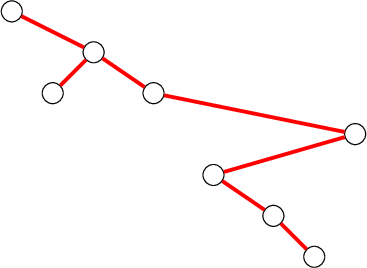

In [19]:
bt = BT8.random_element()
view(bt)

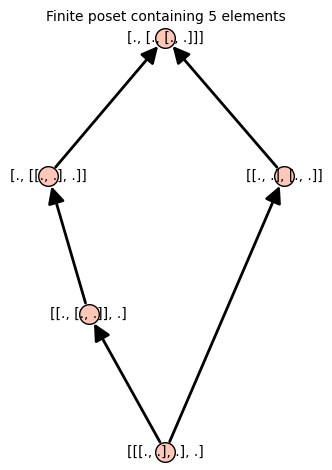

In [20]:
BT3 = list(BinaryTrees(3))
Tam3 = Poset((BT3, lambda x,y: x.tamari_lequal(y)))
Tam3

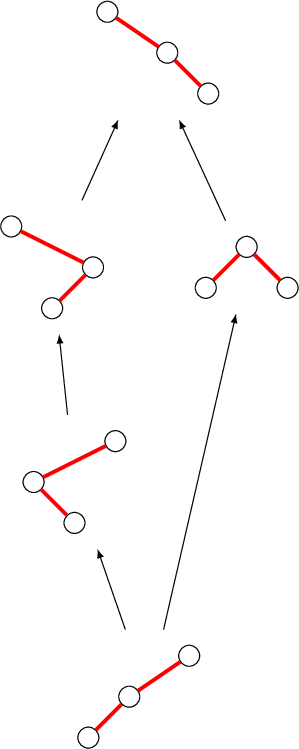

In [21]:
view(Tam3)

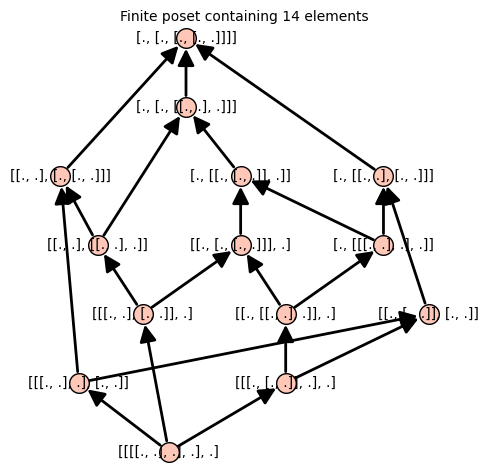

In [22]:
BT4 = list(BinaryTrees(4))
Tam4 = Poset((BT4, lambda x,y: x.tamari_lequal(y)))
Tam4

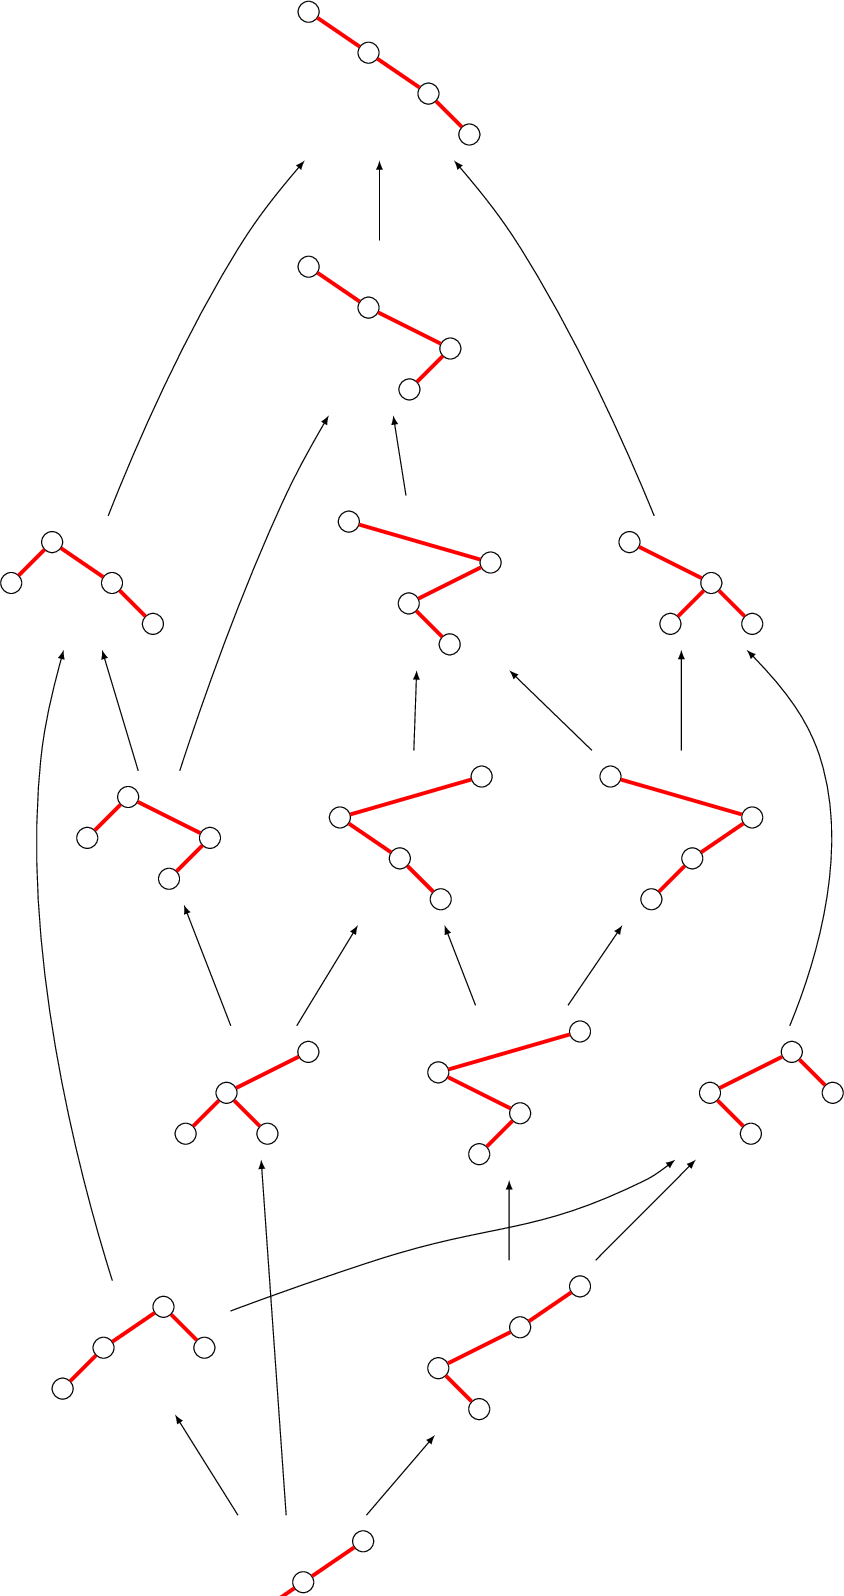

In [23]:
view(Tam4)

In [24]:
def numberOfLeaves(bt):
    if bt.node_number() == 0:
        return 1
    return numberOfLeaves(bt[0]) + numberOfLeaves(bt[1])

def LodayCoordinatesGen(bt):
    if bt.node_number() == 0:
        return
    yield from LodayCoordinates(bt[0])
    yield numberOfLeaves(bt[0])*numberOfLeaves(bt[1])
    yield from LodayCoordinates(bt[1])

def LodayCoordinates(bt):
    return tuple(LodayCoordinatesGen(bt))

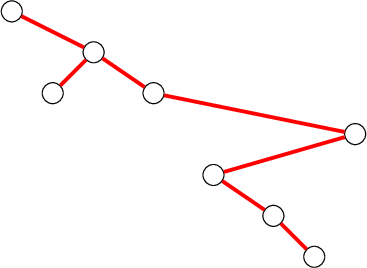

In [25]:
view(bt)

In [26]:
LodayCoordinates(bt)

(8, 1, 12, 5, 3, 2, 1, 4)

In [27]:
Asso3 = Polyhedron([LodayCoordinates(bt) for bt in BT3])
Asso3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 5 vertices (use the .plot() method to plot)

In [28]:
Asso3.plot()

Graphics3d Object

In [31]:
Asso4 = Polyhedron([LodayCoordinates(bt) for bt in BT4])
Asso4.plot()

Graphics3d Object

In [32]:
matrix = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [-ZZ(1)/3, -ZZ(1)/3, -ZZ(1)/3]])
proj = lambda x: list(Matrix(x)*matrix)[0]
Permu4Proj = Permu4.projection(proj)
Asso4Proj = Asso4.projection(proj)

In [33]:
Permu4Proj.plot() + Asso4Proj.plot()

Graphics3d Object

In [34]:
Permu4.inequalities()

(An inequality (0, 1, 1, 1) x - 6 >= 0,
 An inequality (0, 0, 0, 1) x - 1 >= 0,
 An inequality (0, 0, 1, 1) x - 3 >= 0,
 An inequality (0, -1, -1, -1) x + 9 >= 0,
 An inequality (0, -1, 0, -1) x + 7 >= 0,
 An inequality (0, 0, -1, -1) x + 7 >= 0,
 An inequality (0, 1, 0, 0) x - 1 >= 0,
 An inequality (0, -1, -1, 0) x + 7 >= 0,
 An inequality (0, 0, -1, 0) x + 4 >= 0,
 An inequality (0, 0, 0, -1) x + 4 >= 0,
 An inequality (0, 1, 1, 0) x - 3 >= 0,
 An inequality (0, -1, 0, 0) x + 4 >= 0,
 An inequality (0, 0, 1, 0) x - 1 >= 0,
 An inequality (0, 1, 0, 1) x - 3 >= 0)

In [35]:
Asso4.inequalities()

(An inequality (0, 1, 1, 1) x - 6 >= 0,
 An inequality (0, 0, 0, 1) x - 1 >= 0,
 An inequality (0, 0, 1, 1) x - 3 >= 0,
 An inequality (0, -1, -1, -1) x + 9 >= 0,
 An inequality (0, 0, 0, -1) x + 4 >= 0,
 An inequality (0, 1, 0, 0) x - 1 >= 0,
 An inequality (0, 0, 1, 0) x - 1 >= 0,
 An inequality (0, 1, 1, 0) x - 3 >= 0,
 An inequality (0, 0, -1, -1) x + 7 >= 0)

In [37]:
all(ieq in Permu4.inequalities() for ieq in Asso4.inequalities())

True

In [38]:
Tam4.is_lattice()

True

In [39]:
LTam4 = LatticePoset(Tam4)

In [40]:
LTam4.is_sublattice(LW4)

False

In [41]:
bt.to_312_avoiding_permutation()

[2, 7, 6, 5, 8, 4, 3, 1]

In [42]:
Tam4Perms = LatticePoset(([bt.to_312_avoiding_permutation() for bt in BT4], lambda x,y: x.permutohedron_lequal(y, side="right")))

In [43]:
Tam4Perms.is_isomorphic(LTam4)

True

In [44]:
Tam4Perms.is_sublattice(LW4)

True

In [47]:
LW4.quotient?

Signature:      LW4.quotient(congruence, labels='tuple')
Docstring:     
so doctests may not pass.

   Return the quotient lattice by "congruence".

   Let L be a lattice and \Theta be a congruence of L with congruence
   classes \Theta_1, \Theta_2, .... The quotient lattice L/\Theta
   is the lattice with elements \{\Theta_1, \Theta_2, ...\} and
   meet and join given by the original lattice. Explicitly, if e_1 \in
   \Theta_1 and e_2 \in \Theta_2, such that e_1 \vee e_2 \in \Theta_3
   then \Theta_1 \vee \Theta_2 = \Theta_3 in L/\Theta and similarly
   for meets.

   INPUT:

   * "congruence" -- list of lists; a congruence

   * "labels" -- string; the elements of the resulting lattice and can
     be one of the following:

     * "'tuple'" - elements are tuples of elements of the original
       lattice

     * "'lattice'" - elements are sublattices of the original lattice

     * "'integer'" - elements are labeled by integers


     "congruence" is expected to be a valid congruence

In [45]:
p = P4.an_element()

In [46]:
p.binary_search_tree_shape(left_to_right=False)

[[[., .], .], [., .]]

In [47]:
d = {bt:[] for bt in BT4}

In [48]:
for p in P4:
    d[p.binary_search_tree_shape(left_to_right=False)].append(p)

In [49]:
d

{[., [., [., [., .]]]]: [[4, 3, 2, 1]],
 [., [., [[., .], .]]]: [[3, 4, 2, 1]],
 [., [[., .], [., .]]]: [[2, 4, 3, 1], [4, 2, 3, 1]],
 [., [[., [., .]], .]]: [[3, 2, 4, 1]],
 [., [[[., .], .], .]]: [[2, 3, 4, 1]],
 [[., .], [., [., .]]]: [[1, 4, 3, 2], [4, 1, 3, 2], [4, 3, 1, 2]],
 [[., .], [[., .], .]]: [[1, 3, 4, 2], [3, 1, 4, 2], [3, 4, 1, 2]],
 [[., [., .]], [., .]]: [[2, 1, 4, 3], [2, 4, 1, 3], [4, 2, 1, 3]],
 [[[., .], .], [., .]]: [[1, 2, 4, 3], [1, 4, 2, 3], [4, 1, 2, 3]],
 [[., [., [., .]]], .]: [[3, 2, 1, 4]],
 [[., [[., .], .]], .]: [[2, 3, 1, 4]],
 [[[., .], [., .]], .]: [[1, 3, 2, 4], [3, 1, 2, 4]],
 [[[., [., .]], .], .]: [[2, 1, 3, 4]],
 [[[[., .], .], .], .]: [[1, 2, 3, 4]]}

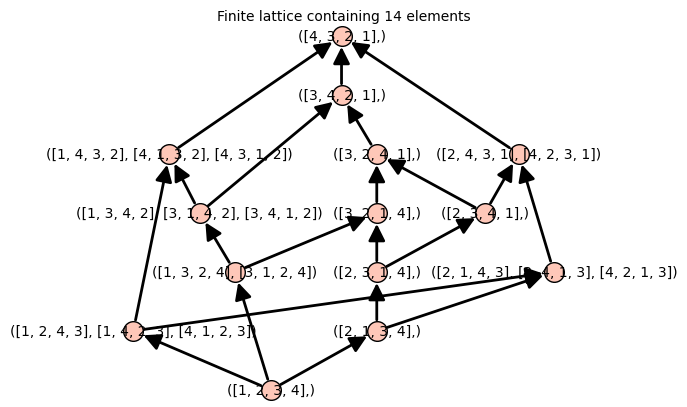

In [50]:
LW4.quotient(d.values())

In [51]:
LW4.quotient(d.values()).is_isomorphic(LTam4)

True